In [1]:
import numpy as np
import pandas as pd
import re
import requests

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from bs4 import BeautifulSoup

In [2]:
df = pd.read_json('data/receitas.json')

In [3]:
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [4]:
# Limpar possíveis entradas duplicadas
df = df.drop_duplicates(subset=['fat', 'date', 'calories', 'desc', 'protein', 'rating', 
                                 'title','sodium'], keep='first').reset_index(drop=True)
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
18289,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
18290,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
18291,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
18292,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [5]:
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
18289,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
18290,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
18291,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
18292,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [6]:
df.describe()

,fat,calories,protein,rating,sodium
count,1.447700e+04,1.453000e+04,14497.000000,18283.000000,1.452900e+04
mean,3.627807e+02,6.610385e+03,92.086363,3.713388,6.562446e+03
std,2.133778e+04,3.744207e+05,3508.485919,1.335214,3.480814e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.050000e+02,3.000000,3.750000,8.800000e+01
50%,1.800000e+01,3.450000e+02,9.000000,4.375000,3.040000e+02
75%,3.400000e+01,5.990000e+02,28.000000,4.375000,7.320000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [7]:
# Coletar as categorias das receitas mais calóricas
categories = df.sort_values('calories', ascending=False).categories.fillna("").to_list()
categories

[['Berry',
  'Fruit',
  'Nut',
  'Dessert',
  'Bake',
  'Christmas',
  'Thanksgiving',
  'Cranberry',
  'Pear',
  'Walnut',
  'Fall',
  'Winter',
  'Gourmet',
  'Vegetarian',
  'Pescatarian',
  'Peanut Free',
  'Soy Free',
  'Kosher'],
 ['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer', 'Tapioca', 'Gourmet'],
 ['Berry',
  'Fruit',
  'Nut',
  'Dessert',
  'Bake',
  'Thanksgiving',
  'Cranberry',
  'Apricot',
  'Walnut',
  'Fall',
  'Bon Appétit',
  'Vegetarian',
  'Pescatarian',
  'Wheat/Gluten-Free',
  'Peanut Free',
  'Soy Free',
  'Kosher'],
 ['Food Processor',
  'Backyard BBQ',
  'Ground Lamb',
  'Spice',
  'Summer',
  'Grill',
  'Grill/Barbecue',
  'Cinnamon',
  'Clove',
  'Parsley',
  'Gourmet'],
 ['Lamb',
  'Rice',
  'Vegetable',
  'Braise',
  'Dinner',
  'Raisin',
  'Meat',
  'Lamb Shank',
  'Root Vegetable',
  'Carrot',
  'Fall',
  'Winter',
  'Gourmet',
  'Wheat/Gluten-Free',
  'Peanut Free',
  'Tree Nut Free',
  'Soy Free',
  'No Sugar Added'],
 ['Chocolate',
  'Nut',
  'Dessert

In [8]:
# Coletar todas as possíveis categorias
categories_list = []
for cat in categories:
    for c in cat:
        categories_list.append(c)
categories_list = pd.Series(categories_list).unique()
categories_list

array(['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', 'Christmas',
       'Thanksgiving', 'Cranberry', 'Pear', 'Walnut', 'Fall', 'Winter',
       'Gourmet', 'Vegetarian', 'Pescatarian', 'Peanut Free', 'Soy Free',
       'Kosher', 'Egg', 'Blueberry', 'Summer', 'Tapioca', 'Apricot',
       'Bon Appétit', 'Wheat/Gluten-Free', 'Food Processor',
       'Backyard BBQ', 'Ground Lamb', 'Spice', 'Grill', 'Grill/Barbecue',
       'Cinnamon', 'Clove', 'Parsley', 'Lamb', 'Rice', 'Vegetable',
       'Braise', 'Dinner', 'Raisin', 'Meat', 'Lamb Shank',
       'Root Vegetable', 'Carrot', 'Tree Nut Free', 'No Sugar Added',
       'Chocolate', 'Almond', 'Christmas Eve', 'Apple', 'Quick & Easy',
       'Pan-Fry', 'Couscous', 'Mushroom', 'Mustard', "Father's Day",
       'Lamb Chop', 'Sugar Conscious', 'Chicken', 'Beef', 'Beef Rib',
       'Red Wine', 'Duck', 'Onion', 'Poultry', 'Roast', 'Parsnip',
       'White Wine', 'Shallot', 'Dairy Free', 'Citrus', 'Ginger',
       'Super Bowl', 'Orange', 'Poker/Game Ni

In [9]:
# Criar um data frame com todas as possíveis categorias.
df_categories = pd.DataFrame({'categories': categories_list, 'count': 0}).set_index('categories')
df_categories

,count
categories,
Berry,0
Fruit,0
Nut,0
Dessert,0
Bake,0
...,...
Las Vegas,0
Camping,0
Egypt,0


In [10]:
# Contar categorias presentes nas 1000 receitas mais calóricas
for i in range(1000):
    for cat in categories[i]:
        df_categories.loc[cat, 'count'] += 1
df_categories

,count
categories,
Berry,11
Fruit,87
Nut,33
Dessert,133
Bake,231
...,...
Las Vegas,0
Camping,0
Egypt,0


In [11]:
#1. A categorias pertencem as comidas mais calóricas?
df_categories.sort_values('count', ascending=False).head()

,count
categories,
Bon Appétit,468
Peanut Free,378
Soy Free,362
Gourmet,342
Tree Nut Free,324


In [12]:
# Coletar os ingredientes das receitas mais calóricas
ingredientes = df.sort_values('calories', ascending=False).ingredients.fillna("").to_frame()
ingredientes

,ingredients
10828,"[2 firm-ripe Anjou pears, peeled, cored, and f..."
6187,"[1 1/4 cups packed light brown sugar, 5 tables..."
17985,"[1 cup (packed) golden brown sugar, 2 large eg..."
2938,"[3 slices firm white sandwich bread, torn into..."
1296,"[3 cups basmati rice (7 ounces), 1 medium onio..."
...,...
18251,"[1 cup sliced peperoncini with 1 cup brine, 1 ..."
18261,"[1/4 pound spaghetti, 1/3 cup finely chopped s..."
18264,"[Poire Williams (clear pear brandy), 6 quarter..."
18274,"[3 tablespoons olive oil, divided, plus more, ..."


In [13]:
unit_list = [
    r'[0-9]+/? ',
    r'^[0-9]+/?',
    r'cup[s]? ',
    r'teaspoon[s]? ',
    r'tablespoon[s]? ',
    r'large? ',
    r'fresh[ly]?[y]?',
    r's$',
    r'extra-virgin ',
    r'all[- ]purpose ',
    r', divided',
    r'chopped ',
    r'dried ',
    r'[ ]?ground [ ]?',
    r'coarse ',
    r'granulated ',
    r' white',
    r' yolk',
    r'firm-ripe ',
    r'peeled,',
    r'cored,',
    r'finely,',
    r'chopped',
    r'canned ',
    r'whole ',
    r'crushed', r'slices ', r'grain ', r'roll', r'into', r'cut',
]
def get_ingredients(ingredient):
    if ingredient:
        for unit in unit_list:
            ingredient = re.sub(unit, '', ingredient)
        #ingredient = re.split(r'(,)*( )*', ingredient)
    return ingredient

In [14]:
ingredientes.ingredients[0][0], get_ingredients(ingredientes.ingredients[0][0])

('4 cups low-sodium vegetable or chicken stock',
 'low-sodium vegetable or chicken stock')

In [15]:
# Coletar tods os possíveis ingredientes
ingredientes_list = []
for item in ingredientes.ingredients:   
    for subitem in item:
        subitem_list = get_ingredients(subitem.lower())
        #for s in subitem_list:
        ingredientes_list.append(subitem_list)
ingredientes_list = pd.Series(ingredientes_list).unique()
ingredientes_list

array(['anjou pears,   and finely ', 'sour cherrie', 'currant', ...,
       'eggplant,  crosswise  1/2-inch-thick slice',
       'soft  goat cheese, room temperature (about ounces)', 'bread or '],
      dtype=object)

In [16]:
# Criar um data frame com todas os possíveis ingredientes.
df_ingredientes = pd.DataFrame({'ingredients': ingredientes_list, 'count': 0}).set_index('ingredients')
df_ingredientes

,count
ingredients,
"anjou pears, and finely",0
sour cherrie,0
currant,0
cranberrie,0
packed light brown sugar,0
...,...
"spinach, coarsely",0
"medium zucchini, each lengthwise slice",0
"eggplant, crosswise 1/2-inch-thick slice",0


In [17]:
# Contar ingredientes presentes nas 1000 receitas mais calóricas
for i in range(1000):
    for item in ingredientes.ingredients[i]:
        df_ingredientes.loc[get_ingredients(item.lower()), 'count'] += 1
df_ingredientes

,count
ingredients,
"anjou pears, and finely",0
sour cherrie,0
currant,3
cranberrie,4
packed light brown sugar,11
...,...
"spinach, coarsely",0
"medium zucchini, each lengthwise slice",0
"eggplant, crosswise 1/2-inch-thick slice",0


In [18]:
#2. Quais os top 10 ingredientes contidos nas receitas mais calóricas?
df_ingredientes.sort_values('count', ascending=False).head(10)

,count
ingredients,
olive oil,304
sugar,262
salt,238
egg,171
water,127
black pepper,125
flour,124
lemon juice,118
kosher salt,94


In [19]:
#3. Se você tivesse que recomendar 3 receitas baseando-se nos dados, quais seriam?

df[(df.calories < df.calories.median()) & (df.protein > df.protein.median()) & 
   (df.sodium<df.sodium.median())].sort_values(
    ['rating', 'protein', 'calories', 'sodium', 'fat'], ascending=[False, False, True, True, True]).head(3)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
9968,[Remove the duck breasts from the refrigerator...,9.0,2013-10-01 04:00:00+00:00,"[Citrus, Duck, Fruit, Poultry, Dinner, Orange,...",324.0,This is a modern rendition of a nineteenth-cen...,42.0,5.0,Duck Bigarade,"[1 1/2 to 2 pounds duck breasts, Kosher salt, ...",209.0
14145,"[Place turkey wings and neck, heart, and gizza...",18.0,2010-10-15 04:00:00+00:00,"[turkey, Thanksgiving, Celery, Leek, Carrot, S...",314.0,None,32.0,5.0,Ultimate Turkey Stock,"[5 1/2 pounds turkey wings Neck, heart, and gi...",137.0
4760,[Cut the carrot and spring onions into a fine ...,8.0,2004-08-20 04:00:00+00:00,"[Egg, Fish, No-Cook, Pine Nut, Tuna, Cabbage, ...",213.0,Editor's note: The recipe and introductory tex...,28.0,5.0,Korean-Style Tuna Tartare,"[2 medium carrots, 4 spring onions, 1 400 g (1...",83.0


In [20]:
from pylab import scatter
import pylab
import matplotlib.pyplot as plt

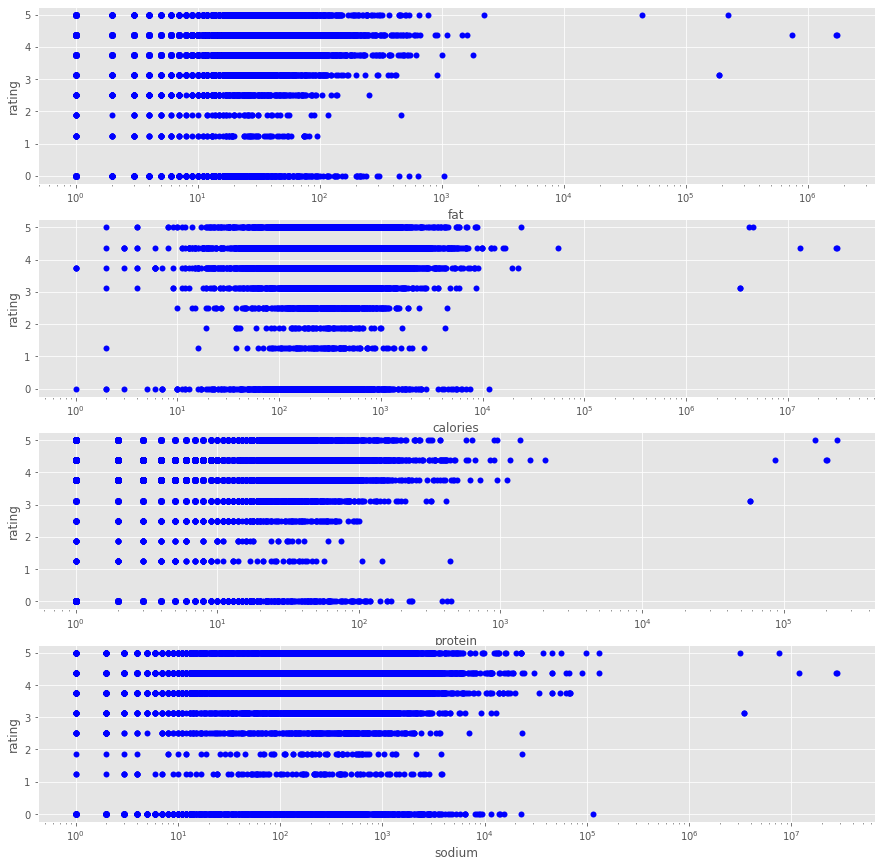

In [21]:
x = {0:'fat', 1:'calories', 2:'protein', 3:'sodium'}
figs, axes = plt.subplots(4,1,figsize=(15,15))
for axe in range(4):
    axes[axe].plot(df[x[axe]] ,df['rating'], 'o', c='blue', markeredgecolor='none')
    axes[axe].set_xscale('log')
    axes[axe].set_ylabel('rating')
    axes[axe].set_xlabel(x[axe])

In [22]:
#4. Alguma característica presente nos dados determina a alta nota de uma receita?
df.corr(method='pearson')

,fat,calories,protein,rating,sodium
fat,1.000000,0.996527,0.770940,0.006925,0.986456
calories,0.996527,1.000000,0.803337,0.007569,0.996518
protein,0.770940,0.803337,1.000000,0.012272,0.819284
rating,0.006925,0.007569,0.012272,1.000000,0.008004
sodium,0.986456,0.996518,0.819284,0.008004,1.000000


In [23]:
# Como esperado, existe uma correlação entre gordura, calorias e sódio, mas parece não haver 
# uma característica que determina a alta nota (rating) de uma receita

In [51]:
df_rating = df.sort_values('rating', ascending=False).head(100)
df_rating

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
2106,[Cut off most of the fatty flap of neck skin a...,NaN,2004-08-20 04:00:00+00:00,"[Duck, Vegetable, Fry, Sauté, Dinner, Parsnip,...",NaN,None,NaN,5.0,Jacques's Skillet Duck with Parsnips and Shallots,"[1 duck, 5 to 5 1/2 pounds, defrosted if froze...",NaN
12747,"[Heat oven to 350°F with rack in lower third.,...",149.0,2011-12-21 04:00:00+00:00,"[Beef, Herb, Olive, Tomato, Braise, Hanukkah, ...",1726.0,"Olives, garlic, herbs, tomato, and wine come t...",59.0,5.0,Provençal Short Ribs with Olives and Herbs,"[1/3 cup all-purpose flour, Salt, Freshly grou...",831.0
8907,"[In a bowl combine the Triple Sec, the brandy,...",0.0,2004-08-20 04:00:00+00:00,"[Champagne, Punch, Alcoholic, Picnic, Backyard...",251.0,None,0.0,5.0,Champagne Punch,"[1 cup Triple Sec, 1 cup brandy, 1/2 cup Chamb...",13.0
10525,[Preheat oven to 350°F. Place large piece of f...,46.0,2004-08-20 04:00:00+00:00,"[Cake, Food Processor, Mixer, Chocolate, Desse...",718.0,None,11.0,5.0,White Chocolate and Raspberry Cheesecake,"[18 vanilla wafer cookies, 1 cup almonds, toas...",301.0
5721,"[Line six 2/3-cup ramekins with plastic wrap, ...",37.0,2004-08-20 04:00:00+00:00,"[Salad, Leafy Green, Brunch, Easter, Lunch, Go...",436.0,A great combination of flavors that makes an e...,21.0,5.0,Prosciutto and Goat Cheese Timbales with Mixed...,"[12 to 16 thin slices prosciutto, 10 ounces so...",1220.0
...,...,...,...,...,...,...,...,...,...,...,...
1779,"[Whisk 1/2 cup reduced-sodium soy sauce, 2 tab...",3.0,2011-06-15 04:00:00+00:00,"[Sauce, Garlic, Ginger, Marinate, Quick & Easy...",130.0,We love this marinade on Kalbi . Try it for an...,7.0,5.0,Korean BBQ Marinade,"[1/2 cup reduced-sodium soy sauce, 2 tablespoo...",2303.0
3432,[1. To make the apple butter: In a large sauce...,NaN,2013-08-21 04:00:00+00:00,"[Dessert, Bake, Apple, Fall, Kidney Friendly, ...",NaN,When I started working at Payard Pâtisserie in...,NaN,5.0,Apple Pithivier,"[6 apples, such as Granny Smith, peeled, halve...",NaN
10553,"[Mix flour, sugar and salt in processor. Add s...",23.0,2004-08-20 04:00:00+00:00,"[Dessert, Bake, Christmas, Almond, Cashew, Pec...",364.0,"Filled with a mixture of nuts, brown sugar, ho...",5.0,5.0,Nutcracker Tart,"[1 1/4 cups all purpose flour, 2 teaspoons sug...",106.0
5778,"[Preheat oven to 375° F., Halve pitas horizont...",NaN,2004-08-20 04:00:00+00:00,"[Bread, Bake, Quick & Easy, Gourmet]",NaN,This recipe was created to accompany Chunky Cl...,NaN,5.0,Pita Toasts,"[four 6-inch pita loaves, about 1/4 cup olive ...",NaN


85

In [28]:
categorias = df.sort_values('rating', ascending=False).categories[:100].fillna("").to_frame()
categorias

,categories
2106,"[Duck, Vegetable, Fry, Sauté, Dinner, Parsnip,..."
12747,"[Beef, Herb, Olive, Tomato, Braise, Hanukkah, ..."
8907,"[Champagne, Punch, Alcoholic, Picnic, Backyard..."
10525,"[Cake, Food Processor, Mixer, Chocolate, Desse..."
5721,"[Salad, Leafy Green, Brunch, Easter, Lunch, Go..."
...,...
1779,"[Sauce, Garlic, Ginger, Marinate, Quick & Easy..."
3432,"[Dessert, Bake, Apple, Fall, Kidney Friendly, ..."
10553,"[Dessert, Bake, Christmas, Almond, Cashew, Pec..."
5778,"[Bread, Bake, Quick & Easy, Gourmet]"


In [32]:
# Coletar todas as possíveis categorias
categories_list = []
for cat in categorias.categories:
    for c in cat:
        categories_list.append(c)
categories_list = pd.Series(categories_list).unique()
categories_list

array(['Duck', 'Vegetable', 'Fry', 'Sauté', 'Dinner', 'Parsnip', 'Fall',
       'Shallot', 'Dairy Free', 'Wheat/Gluten-Free', 'Peanut Free',
       'Tree Nut Free', 'Soy Free', 'No Sugar Added', 'Kosher', 'Beef',
       'Herb', 'Olive', 'Tomato', 'Braise', 'Hanukkah', 'Meat',
       'Beef Rib', 'Winter', 'Gourmet', 'Champagne', 'Punch', 'Alcoholic',
       'Picnic', 'Backyard BBQ', 'Cocktail', 'Pineapple', 'Brandy',
       'Chambord', 'Triple Sec', 'Spring', 'Summer', 'Chill', 'Drink',
       'Cake', 'Food Processor', 'Mixer', 'Chocolate', 'Dessert', 'Bake',
       "Valentine's Day", 'Cream Cheese', 'Raspberry', 'Almond', 'Party',
       'Sour Cream', 'Bon Appétit', 'Vegetarian', 'Pescatarian', 'Salad',
       'Leafy Green', 'Brunch', 'Easter', 'Lunch', 'Goat Cheese',
       'Green Bean', 'Prosciutto', 'Sugar Conscious', 'Steak', 'Coffee',
       'Chile Pepper', 'Oregano', 'Rub', 'Coriander', 'Las Vegas',
       'Paprika', 'Pork', 'Breakfast', 'Kid-Friendly', 'Quick & Easy',
       'Pa

In [33]:
# Criar um data frame com todas as possíveis categorias.
df_categories = pd.DataFrame({'categories': categories_list, 'count': 0}).set_index('categories')
df_categories

,count
categories,
Duck,0
Vegetable,0
Fry,0
Sauté,0
Dinner,0
...,...
Salad Dressing,0
Jam or Jelly,0
Green Onion/Scallion,0


In [64]:
URL = 'https://www.epicurious.com/search/'
content = '?content=recipe'
for index, data in df_categories.iterrows():
    r = requests.get(url=URL+index+content)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    articles = parsed_page.find_all('p', {'class':"results-message"})
    for article in articles:
        found = article.find('span', {'class':'matching-count'}).getText()
        if found:
            df_categories.loc[index, 'count'] = found

In [63]:
df_categories

,count
categories,
Duck,0
Vegetable,0
Fry,0
Sauté,0
Dinner,0
...,...
Salad Dressing,0
Jam or Jelly,0
Green Onion/Scallion,0


In [43]:
URL = 'https://www.epicurious.com/search/'
content = '?content=recipe'
r = requests.get(url=URL+df_categories.index[0]+content)

In [45]:
parsed_page = BeautifulSoup(r.text,"html.parser")
    
articles = parsed_page.find_all('p', {'class':"results-message"})

In [50]:
articles[0].find('span', {'class':'matching-count'}).getText()

'237'

In [60]:
df_categories.count[0]

TypeError: 'method' object is not subscriptable

In [ ]:
count = 0
URL = 'https://www.epicurious.com/search/'
for index, data in df[:100].iterrows():
    r = requests.get(url=URL+data.title)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    articles = parsed_page.find_all(
        'article', itemtype="https://schema.org/Recipe")
    for article in articles:
        found = article.find('a', title=data.title)
        if found:
            count = count+1
count